In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import shapiro, ttest_1samp

In [2]:
df = pd.read_csv('Data2.csv', on_bad_lines='skip', delimiter=';', encoding='cp1252')

# rename columns
df.columns = ['country_name', 'region', 'gdp_per_capita', 'population', 'co2_emission', 'area']
df.set_index('country_name', inplace=True)

# str fields to float
df.gdp_per_capita = df.gdp_per_capita.astype(str).str.replace(',', '.').astype(float)
df.co2_emission = df.co2_emission.astype(str).str.replace(',', '.').astype(float)
df.area = df.area.astype(str).str.replace(',', '.').astype(float)

# take absolute
df.gdp_per_capita = df.gdp_per_capita.abs()
df.area = df.area.abs()

# fill empty with means
df.gdp_per_capita.fillna(df.gdp_per_capita.mean(), inplace=True)
df.population.fillna(df.population.mean(), inplace=True)
df.co2_emission.fillna(df.co2_emission.mean(), inplace=True)

# population as int
df.population = df.population.astype(int)

df

,region,gdp_per_capita,population,co2_emission,area
country_name,,,,,
Afghanistan,South Asia,561.778746,34656032,9809.225000,652860.0
Albania,Europe & Central Asia,4124.982390,2876101,5716.853000,28750.0
Algeria,Middle East & North Africa,3916.881571,40606052,145400.217000,2381740.0
American Samoa,East Asia & Pacific,11834.745230,55599,165114.116337,200.0
Andorra,Europe & Central Asia,36988.622030,77281,462.042000,470.0
...,...,...,...,...,...
Virgin Islands (U.S.),Latin America & Caribbean,13445.593416,102951,165114.116337,350.0
West Bank and Gaza,Middle East & North Africa,2943.404534,4551566,165114.116337,6020.0
"Yemen, Rep.",Middle East & North Africa,990.334774,27584213,22698.730000,527970.0


In [3]:
# 2. Вказати, чи є параметри, що розподілені за нормальним законом
for col in df.select_dtypes(include="number").columns:
    stat, pval = shapiro(df[col])

    if pval <= 0.05:
        print(f"Для параметру {col} гіпотеза про нормальний розподіл відкидається (p-value: {pval:.4f})")
    else:
        print(f"Для параметру {col} гіпотеза про нормальний розподіл не відкидається (p-value: {pval:.4f})")

Для параметру gdp_per_capita гіпотеза про нормальний розподіл відкидається (p-value: 0.0000)
Для параметру population гіпотеза про нормальний розподіл відкидається (p-value: 0.0000)
Для параметру co2_emission гіпотеза про нормальний розподіл відкидається (p-value: 0.0000)
Для параметру area гіпотеза про нормальний розподіл відкидається (p-value: 0.0000)


In [4]:
# 3. Перевірити гіпотезу про рівність середнього і медіани для одного з параметрів
for col in df.select_dtypes(include="number").columns:
    data = df[col]
    stat, pval = ttest_1samp(data, data.median())

    if pval <= 0.05:
        print(f"Для параметру {col} гіпотеза про рівність середнього і медіани відкидається")
    else:
        print(f"Для параметру {col} гіпотеза про рівність середнього і медіани не відкидається")

Для параметру gdp_per_capita гіпотеза про рівність середнього і медіани відкидається
Для параметру population гіпотеза про рівність середнього і медіани відкидається
Для параметру co2_emission гіпотеза про рівність середнього і медіани відкидається
Для параметру area гіпотеза про рівність середнього і медіани відкидається


In [5]:
# 4. Вказати, в якому регіоні розподіл викидів СО2 найбільш близький до нормального
param = 'co2_emission'
for region in df['region'].unique():
    stat, pval = shapiro(df[df['region'] == region][param])

    if pval <= 0.05:
        print(f"Для регіону {region} гіпотеза про нормальний розподіл параметру {param} відкидається")
    else:
        print(f"Для регіону {region} гіпотеза про нормальний розподіл параметру {param} не відкидається")

Для регіону South Asia гіпотеза про нормальний розподіл параметру co2_emission відкидається
Для регіону Europe & Central Asia гіпотеза про нормальний розподіл параметру co2_emission відкидається
Для регіону Middle East & North Africa гіпотеза про нормальний розподіл параметру co2_emission відкидається
Для регіону East Asia & Pacific гіпотеза про нормальний розподіл параметру co2_emission відкидається
Для регіону Sub-Saharan Africa гіпотеза про нормальний розподіл параметру co2_emission відкидається
Для регіону Latin America & Caribbean гіпотеза про нормальний розподіл параметру co2_emission відкидається
Для регіону North America гіпотеза про нормальний розподіл параметру co2_emission не відкидається


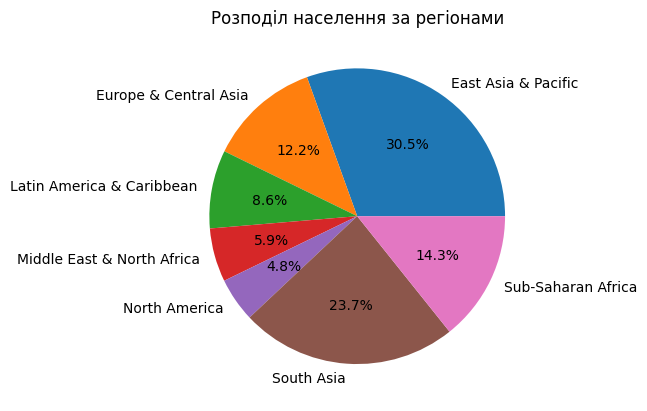

In [6]:
# 5. Побудувати кругову діаграму населення по регіонам
df.groupby('region')['population'].sum().plot(kind="pie", autopct='%1.1f%%')
plt.title("Розподіл населення за регіонами")
plt.ylabel(None)
plt.show()